<a id="TableOfContents"></a>
# TABLE OF CONTENTS:
<li><a href='#imports'>Imports</a></li>
<li><a href="#telco">Get Telco Dataset</a></li>
<li><a href="#split">Split Telco Dataset</a></li>
<li><a href="#keycol">Key Columns</a></li>
<li><a href="#DTC">Decision Tree Classifier Modeling</a></li>
<li><a href="#RFC">Random Forest Classifier Modeling</a></li>
<li><a href="#KNN">K-Nearest Neighbors Modeling</a></li>
<li><a href="#LR">Logistic Regression Modeling</a></li>
<li><a href="#top3">Top 3 Models</a></li>

##### Orientation:
The purpose of this file is to create models to predict whether or not a customer will churn and get the best performing models.

<a id='imports'></a>
# IMPORTS:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [61]:
# tabular data
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# DecisionTree modeling:
from sklearn.tree import DecisionTreeClassifier as DTC, export_text, plot_tree

# RandomForest modeling:
from sklearn.ensemble import RandomForestClassifier as RFC

# KNN modeling:
from sklearn.neighbors import KNeighborsClassifier as KNN

# Logistic Regression modeling:
from sklearn.linear_model import LogisticRegression as LR

# Other sklearn stuff
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# .py files
import prepare
import evaluation
import model

from sklearn.feature_selection import SelectKBest, chi2

In [365]:
tester = DTC(criterion='gini',
            splitter='best',
            max_depth=10,
            min_samples_split=79,
            min_samples_leaf=25,
            max_features=5,
            random_state=100,
            min_impurity_decrease=0.00,
            ccp_alpha=0.001)
tester.fit(x_train, y_train)
tester.score(x_test, y_test)

0.7466288147622427

In [372]:
tester = DTC(random_state=100)
tester.fit(x_train, y_train)
tester.score(x_test, y_test)

0.7075940383250532

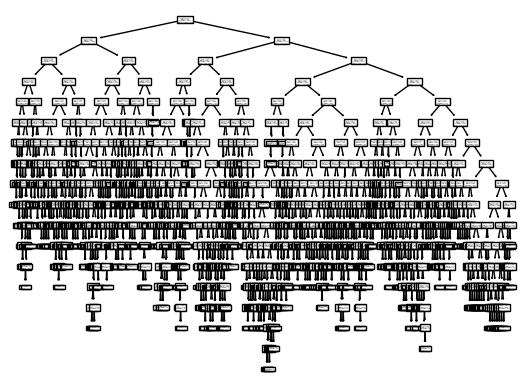

17

In [245]:
default = DTC()
default.fit(x_train, y_train)
plot_tree(default)
plt.show()
default.tree_.max_depth

<a id='telco'></a>
# Get Telco Dataset:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [216]:
# Acquire cleaned 'telco' dataset
telco = prepare.prep_telco()
telco.sample()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Two_year,internet_service_type_DSL,internet_service_type_Fiber_optic,internet_service_type_None,payment_type_Bank_transfer_(automatic),payment_type_Credit_card_(automatic),payment_type_Electronic_check,payment_type_Mailed_check,total_services,total_extra_services
1023,Female,0,No,No,1,Yes,No,No,No,No,...,0,1,0,0,0,0,1,0,2,0


<a id='split'></a>
# Split Telco Dataset:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [3]:
# Split telco dataset
train, val, test = prepare.split(telco, 'churn')

train.shape:(3943, 67)
validate.shape:(1691, 67)
test.shape:(1409, 67)


In [4]:
# Verify split shapes
train.shape, val.shape, test.shape

((3943, 67), (1691, 67), (1409, 67))

<a id='keycol'></a>
# Key Columns:
<li><a href='#TableOfContents'>Table of Contents</a></li>

- Columns:
    - 'partner'
    - 'dependents'
    - 'online_security'
    - 'online_backup'
    - 'device_protection'
    - 'tech_support'
    - 'streaming_tv'
    - 'streaming_movies'
    - 'payment_type'
    - 'contract_type'
    - 'total_services'
    - 'total_extra_services'

# List of pertinent columns
keylist = [
    'partner_Yes',
    'partner_No',
    'dependents_Yes',
    'dependents_No',
    'online_security_Yes',
    'online_security_No',
    'online_security_No_internet_service',
    'online_backup_Yes',
    'online_backup_No',
    'online_backup_No_internet_service',
    'device_protection_Yes',
    'device_protection_No',
    'device_protection_No_internet_service',
    'tech_support_Yes',
    'tech_support_No',
    'tech_support_No_internet_service',
    'streaming_tv_Yes',
    'streaming_tv_No',
    'streaming_tv_No_internet_service',
    'streaming_movies_Yes',
    'streaming_movies_No',
    'streaming_movies_No_internet_service',
    'payment_type_Bank_transfer_(automatic)',
    'payment_type_Credit_card_(automatic)',
    'payment_type_Electronic_check',
    'payment_type_Mailed_check',
    'contract_type_Month-to-month',
    'contract_type_One_year',
    'contract_type_Two_year',
    'total_services',
    'total_extra_services'
]

In [370]:
# List of pertinent columns
# Bin signup_date
keylist = [
    'senior_citizen',
    'partner_No',
    'dependents_No',
    'payment_type_Electronic_check',
    'contract_type_Month-to-month',
    'internet_service_type_Fiber_optic',
    'monthly_charges',
    'total_extra_services',
]

In [371]:
# Assign x/y train/val/test cols:
x_train = train[keylist]
y_train = train['churn']
x_val = val[keylist]
y_val = val['churn']
x_test = test[keylist]
y_test = test['churn']

<a id='DTC'></a>
# Decision Tree Classifier Modeling:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [54]:
# Create base dictionary
dtcscores = {
    'model' : ['actual'],
    'train' : [100],
    'val' : [100],
    'diff' : [0],
    'test' : [100]
}

In [55]:
# Add baseline to dictionary
baselinetrain = round((train.churn == 'No').mean(), 5)
baselineval = round((val.churn == 'No').mean(), 5)
baselinediff = round(abs(baselinetrain - baselineval), 5)
baselinetest = round((test.churn == 'No').mean(), 5)
dtcscores['model'].append('baseline')
dtcscores['train'].append(baselinetrain)
dtcscores['val'].append(baselineval)
dtcscores['diff'].append(baselinediff)
dtcscores['test'].append(baselinetest)

In [56]:
# Confirm df funcitonality with actual and baseline
pd.DataFrame.from_dict(dtcscores)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
1,baseline,0.73472,0.73448,0.00024,0.73456


In [57]:
# Make and fit DTC of 2-15 depth to train
for i in range(2, 16):
    dtc = DTC(max_depth=i, random_state=100)
    dtc.fit(x_train, y_train)
    model = dtc.predict(x_train)
    trainscore = round(dtc.score(x_train, y_train), 5)
    valscore = round(dtc.score(x_val, y_val), 5)
    diffscore = round(abs(trainscore - valscore), 5)
    testscore = round(dtc.score(x_test, y_test), 5)
    dtcscores['model'].append(f'model{i}')
    dtcscores['train'].append(trainscore)
    dtcscores['val'].append(valscore)
    dtcscores['diff'].append(diffscore)
    dtcscores['test'].append(testscore)

In [58]:
# Find best 'train' model
pd.DataFrame.from_dict(dtcscores).sort_values(by='train', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.0000,100.00000,0.00000,100.00000
15,model15,0.8808,0.72028,0.16052,0.70688


In [59]:
# Find best 'val' model
pd.DataFrame.from_dict(dtcscores).sort_values(by='val', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
4,model4,0.78849,0.76818,0.02031,0.76011


In [60]:
# Find best 'test' model
pd.DataFrame.from_dict(dtcscores).sort_values(by='test', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
4,model4,0.78849,0.76818,0.02031,0.76011


- Best Train Model:
    - model 15 @ 88.1%
        - Restrictions:
            - max_depth = 15
            - random_state=100
- Best Validate Model:
    - model 4 @ 76.8%
        - Restrictions:
            - max_depth = 4
            - random_state=100
- Best Test Model:
    - model 4 @ 76.0%
        - Restrictions:
            - max_depth = 4
            - random_state=100
- Baseline:
    - 73.5%

<a id='RFC'></a>
# Random Forest Classifier Modeling:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [14]:
# Create base dictionary
rfcscores = {
    'model' : ['actual'],
    'train' : [100],
    'val' : [100],
    'diff' : [0],
    'test' : [100]
}

In [15]:
# Add baseline to dictionary
baselinetrain = round((train.churn == 'No').mean(), 5)
baselineval = round((val.churn == 'No').mean(), 5)
baselinediff = round(abs(baselinetrain - baselineval), 5)
baselinetest = round((test.churn == 'No').mean(), 5)
rfcscores['model'].append('baseline')
rfcscores['train'].append(baselinetrain)
rfcscores['val'].append(baselineval)
rfcscores['diff'].append(baselinediff)
rfcscores['test'].append(baselinetest)

In [16]:
# Confirm df funcitonality with actual and baseline
pd.DataFrame.from_dict(rfcscores)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
1,baseline,0.73472,0.73448,0.00024,0.73456


In [17]:
# Make and fit RFC of 2-15 depth to train
for i in range(2, 16):
    rfc = RFC(max_depth=i, random_state=100)
    rfc.fit(x_train, y_train)
    model = rfc.predict(x_train)
    trainscore = round(rfc.score(x_train, y_train), 5)
    valscore = round(rfc.score(x_val, y_val), 5)
    diffscore = round(abs(trainscore - valscore), 5)
    testscore = round(rfc.score(x_test, y_test), 5)
    rfcscores['model'].append(f'model{i}')
    rfcscores['train'].append(trainscore)
    rfcscores['val'].append(valscore)
    rfcscores['diff'].append(diffscore)
    rfcscores['test'].append(testscore)

In [18]:
# Find best 'train' model
pd.DataFrame.from_dict(rfcscores).sort_values(by='train', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.0000,100.00000,0.00000,100.00000
15,model15,0.8808,0.73448,0.14632,0.72605


In [19]:
# Find best 'val' model
pd.DataFrame.from_dict(rfcscores).sort_values(by='val', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.0000
6,model6,0.79635,0.76641,0.02994,0.7665


In [20]:
# Find best 'test' model
pd.DataFrame.from_dict(rfcscores).sort_values(by='test', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.0000
6,model6,0.79635,0.76641,0.02994,0.7665


- Best Train Model:
    - model 15 @ 88.1%
        - Restrictions:
            - max_depth = 15
            - random_state=100
- Best Validate Model:
    - model 6 @ 76.6%
        - Restrictions:
            - max_depth = 6
            - random_state=100
- Best Test Model:
    - model 6 @ 76.7%
        - Restrictions:
            - max_depth = 6
            - random_state=100
- Baseline:
    - 73.5%

<a id='KNN'></a>
# K-Nearest Neighbors Modeling:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [21]:
# Create base dictionary
knnscores = {
    'model' : ['actual'],
    'train' : [100],
    'val' : [100],
    'diff' : [0],
    'test' : [100]
}

In [22]:
# Add baseline to dictionary
baselinetrain = round((train.churn == 'No').mean(), 5)
baselineval = round((val.churn == 'No').mean(), 5)
baselinediff = round(abs(baselinetrain - baselineval), 5)
baselinetest = round((test.churn == 'No').mean(), 5)
knnscores['model'].append('baseline')
knnscores['train'].append(baselinetrain)
knnscores['val'].append(baselineval)
knnscores['diff'].append(baselinediff)
knnscores['test'].append(baselinetest)

In [23]:
# Confirm df funcitonality with actual and baseline
pd.DataFrame.from_dict(knnscores)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
1,baseline,0.73472,0.73448,0.00024,0.73456


In [24]:
# Make and fit KNN of 1-15 neighbors to train
for i in range(1, 16):
    knn = KNN(n_neighbors=i)
    knn.fit(x_train, y_train)
    model = knn.predict(x_train)
    trainscore = round(knn.score(x_train, y_train), 5)
    valscore = round(knn.score(x_val, y_val), 5)
    diffscore = round(abs(trainscore - valscore), 5)
    testscore = round(knn.score(x_test, y_test), 5)
    knnscores['model'].append(f'model{i}')
    knnscores['train'].append(trainscore)
    knnscores['val'].append(valscore)
    knnscores['diff'].append(diffscore)
    knnscores['test'].append(testscore)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [25]:
# Find best 'train' model
pd.DataFrame.from_dict(knnscores).sort_values(by='train', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
2,model1,0.84809,0.69486,0.15323,0.69624


In [26]:
# Find best 'val' model
pd.DataFrame.from_dict(knnscores).sort_values(by='val', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.0000,0.00000,100.00000
13,model12,0.80269,0.7469,0.05579,0.74805


In [27]:
# Find best 'test' model
pd.DataFrame.from_dict(knnscores).sort_values(by='test', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.0000,100.00000
15,model14,0.79483,0.74453,0.0503,0.74876


- Best Train Model:
    - model 1 @ 84.8%
        - Restrictions:
            - n_neighbors = 1
- Best Validate Model:
    - model 12 @ 74.7%
        - Restrictions:
            - n_neighbors = 12
- Best Test Model:
    - model 14 @ 74.9%
        - Restrictions:
            - n_neighbors = 14
- Baseline:
    - 73.5%

<a id='LR'></a>
# Logistic Regression Modeling:
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [28]:
# Create base dictionary
lrscores = {
    'model' : ['actual'],
    'train' : [100],
    'val' : [100],
    'diff' : [0],
    'test' : [100]
}

In [29]:
# Add baseline to dictionary
baselinetrain = round((train.churn == 'No').mean(), 5)
baselineval = round((val.churn == 'No').mean(), 5)
baselinediff = round(abs(baselinetrain - baselineval), 5)
baselinetest = round((test.churn == 'No').mean(), 5)
lrscores['model'].append('baseline')
lrscores['train'].append(baselinetrain)
lrscores['val'].append(baselineval)
lrscores['diff'].append(baselinediff)
lrscores['test'].append(baselinetest)

In [30]:
# Confirm df funcitonality with actual and baseline
pd.DataFrame.from_dict(lrscores)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
1,baseline,0.73472,0.73448,0.00024,0.73456


In [31]:
# Make and fit LR to train
lr = LR(random_state=100)
lr.fit(x_train, y_train)
model = lr.predict(x_train)
trainscore = round(lr.score(x_train, y_train), 5)
valscore = round(lr.score(x_val, y_val), 5)
diffscore = round(abs(trainscore - valscore), 5)
testscore = round(lr.score(x_test, y_test), 5)
lrscores['model'].append('model1')
lrscores['train'].append(trainscore)
lrscores['val'].append(valscore)
lrscores['diff'].append(diffscore)
lrscores['test'].append(testscore)

In [32]:
# Find best 'train' model
pd.DataFrame.from_dict(lrscores).sort_values(by='train', ascending=False).head(2)

,model,train,val,diff,test
0,actual,100.00000,100.00000,0.00000,100.00000
2,model1,0.79508,0.75872,0.03636,0.76224


- Best Train Model:
    - model 1 @ 79.5%
        - Restrictions:
            - random_state=100
- Best Validate Model:
    - model 1 @ 75.9%
        - Restrictions:
            - random_state=100
- Best Test Model:
    - model 1 @ 76.2%
        - Restrictions:
            - random_state=100
- Baseline:
    - 73.5%

<a id='top3'></a>
# Top 3 Models:
<li><a href='#TableOfContents'>Table of Contents</a></li>